In [19]:
from itertools import product
 

 
l = list(product(range(1, 5), repeat=2x\))



In [23]:
import numpy as np  

N = 5
adj_matrix = np.ones((N, N), dtype=int) 

In [24]:
adj_matrix

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [25]:
# set adj to ramdom values
adj_matrix = np.random.randint(0, 2, (N, N))

In [26]:
adj_matrix

array([[1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 0, 0, 1, 1]])

In [27]:
neighbors_i = np.where(adj_matrix[2] == 1)[0].tolist()

In [28]:
neighbors_i

[2, 3]

In [36]:
adj_matrix[4,2] = 1

In [29]:
adj_matrix[:, 2]

array([0, 1, 1, 0, 0])

In [31]:
adj_matrix[2]

array([0, 0, 1, 1, 0])

In [32]:
np.where(adj_matrix[:,2] == 1)[0].tolist()

[1, 2]

In [37]:
i =2
j = 3

In [38]:
neighbors_i = np.where(adj_matrix[:,i] == 1)[0].tolist()
neighbors_j = np.where(adj_matrix[:,j] == 1)[0].tolist()
if j in neighbors_i:
    neighbors_i.remove(j)  # exclude j from neighbors
if i in neighbors_j:
    neighbors_j.remove(i)
# get the common neighbors
common_neighbors = set(neighbors_i).intersection(neighbors_j)

In [42]:
list(common_neighbors)

[4]

## Code for presentation

Correlation between X and Y: 0.842

Regression of Y on X:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     2424.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.79e-269
Time:                        15:01:51   Log-Likelihood:                -1954.1
No. Observations:                1000   AIC:                             3912.
Df Residuals:                     998   BIC:                             3922.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

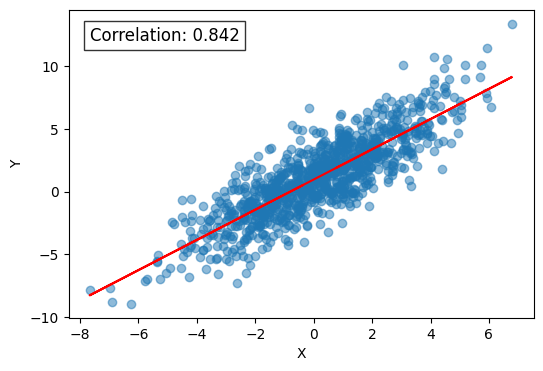

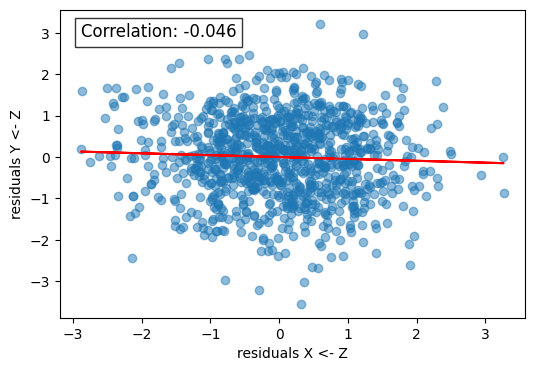

In [54]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- 1. Generate data ---
np.random.seed(40)  # For reproducibility
N = 1000

Z = np.random.randn(N)                 # Z ~ N(0,1)
X = 2*Z + np.random.randn(N)           # X = 2Z + noise
Y = 3*Z + 1 + np.random.randn(N)       # Y = 3Z + 1 + noise

# --- 2. Correlation and linear regression Y <- X ---
corr_XY = np.corrcoef(X, Y)[0, 1]
print(f"Correlation between X and Y: {corr_XY:.3f}")

# Linear regression Y ~ X
X_design = sm.add_constant(X)  # Adds intercept
model_X_to_Y = sm.OLS(Y, X_design).fit()
print("\nRegression of Y on X:")
print(model_X_to_Y.summary())

# --- 3. Condition on Z ---
# Regress out Z from X
Z_design = sm.add_constant(Z)
model_Z_to_X = sm.OLS(X, Z_design).fit()
X_residuals = model_Z_to_X.resid  # Residuals of X after regressing on Z
print(model_Z_to_X.summary())

# Regress out Z from Y
model_Z_to_Y = sm.OLS(Y, Z_design).fit()
Y_residuals = model_Z_to_Y.resid  # Residuals of Y after regressing on Z
print(model_Z_to_Y.summary())

# Compute correlation between residuals
corr_residuals = np.corrcoef(X_residuals, Y_residuals)[0, 1]
print(f"\nCorrelation between residuals (X_res, Y_res) after conditioning on Z: {corr_residuals:.3f}")

# --- 4. Plot regression results ---

def plot_regression(X, Y,x_label,y_label, model, correlation):
    """Plots a scatter plot and the regression line."""
    plt.figure(figsize=(6,4))
    plt.scatter(X, Y, alpha=0.5, label="Data")
    plt.plot(X, model.predict(sm.add_constant(X)), color='red', label="Regression Line")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.legend()

    # Adding correlation text inside the plot
    plt.text(np.min(X), np.max(Y)*0.90, f"Correlation: {correlation:.3f}", fontsize=12, color="black", 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
    plt.show()

# Plot Y ~ X
plot_regression(X, Y,"X","Y", model_X_to_Y, corr_XY)

# Plot residuals regression
residuals_model = sm.OLS(Y_residuals, sm.add_constant(X_residuals)).fit()
plot_regression(X_residuals, Y_residuals,"residuals X <- Z","residuals Y <- Z", residuals_model, corr_residuals)
